In [1]:
# Base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Model libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from sklearn.inspection import permutation_importance


## **Table of Contents**

### **1. Data Collection and Preprocessing**
- [Collect poverty data](#1.1-Collect-poverty-data)  
- [Data Preprocessing - Separate feature and target variables](#1.2-Data-Preprocessing---Separate-feature-and-target-variables)  
- [Data Preprocessing - Normalize feature variables for transformed and non-transformed data](#1.3-Data-Preprocessing---Normalize-feature-variables-for-transformed-and-non-transformed-data)  
- [Data Preprocessing - Convert transformed continuous target variable into binary and multi-class variables](#1.4-Data-Preprocessing---Convert-transformed-continuous-target-variable-into-binary-and-multi-class-variables)  
- [Data Preprocessing - Convert continuous non-transformed target variable into binary and multi-class variables](#1.5-Data-Preprocessing---Convert-continuous-non-transformed-target-variable-into-binary-and-multi-class-variables)  
- [Develop functions for heatmap confusion matrix to be used in model evaluation](#1.6-Develop-functions-for-heatmap-confusion-matrix-to-be-used-in-model-evaluation)  

### **2. Regression Models**
- [Regression Model's train/test split of continuous transformed dataset](#2.1-Regression-Model's-train/test-split-of-continuous-transformed-dataset)  
- [Linear & Polynomial Regression - Train and fit data](#2.2-Linear-&-Polynomial-Regression---Train-and-fit-data)  
- [Support Vector Machine Regressor - Train and fit data](#2.3-Support-Vector-Machine-Regressor---Train-and-fit-data)  

### **3. Discriminative Models**
- [Discriminative train/test split with multi-class target data](#3.1-Discriminative-model's-train/test-split-with-multi-class-target-data)  
- **3.2 Multi-Class Logistic Regression**
  - [Train and fit data](#3.2-Multi-Class-Logistic-Regression---Train-and-fit-data)  
  - [Evaluate model performance metrics](#3.2a-Multi-Class-Logistic-Regression---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#3.2b-Multi-Class-Logistic-Regression---Evaluate-feature-importance-ranking)  
- **3.3 Multi-Class Support Vector Machine**
  - [Train and fit data](#3.3-Multi-Class-Support-Vector-Machine---Train-and-fit-data) 
  - [Evaluate model performance metrics](#3.3a-Multi-Class-Support-Vector-Machine---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#3.3b-Multi-Class-Support-Vector-Machine---Evaluate-feature-importance-ranking)  
- [Discriminative model's train/test split with binary-class transformed target variable](#3.4-Discriminative-model's-train/test-split-with-binary-class-transformed-target-variable)  
- **3.5 Binary-Class Logistic Regression**
  - [Train and fit data](#3.5-Binary-Class-Logistic-Regression---Train-and-fit-data)  
  - [Evaluate model performance metrics](#3.5a-Binary-Class-Logistic-Regression---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#3.5b-Binary-Class-Logistic-Regression---Evaluate-feature-importance-ranking)  
- **3.6 Binary-Class Support Vector Machine**
  - [Train and fit data](#3.6-Binary-Class-Support-Vector-Machine---Train-and-fit-data)  
  - [Evaluate model performance metrics](#3.6a-Binary-Class-Support-Vector-Machine---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#3.6b-Binary-Class-Support-Vector-Machine---Evaluate-feature-importance-ranking)  

### **4. Tree Models**
- [Tree model's train/test split with non-transformed multi-class target variable](#4.1-Tree-model's-train/test-split-with-non-transformed-multi-class-target-variable) 
- **4.2 Multi-Class Decision Tree**
  - [Train and fit data](#4.2-Multi-Class-Decision-Tree---Train-and-fit-data)  
  - [Evaluate model performance metrics](#4.2a-Multi-Class-Decision-Tree---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#4.2b-Multi-Class-Decision-Tree---Evaluate-feature-importance-ranking) 
- **4.3 Multi-Class Random Forest**
  - [Train and fit data](#4.3-Multi-Class-Random-Forest---Train-and-fit-data)  
  - [Evaluate model performance metrics](#4.3a-Multi-Class-Random-Forest---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#4.3b-Multi-Class-Random-Forest---Evaluate-feature-importance-ranking)  
- [Tree model's train/test split with non-transformed binary target variable](#4.4-Tree-model's-train/test-split-with-non-transformed-binary-target-variable)  
- **4.5 Binary-Class Decision Tree**
  - [Train and fit data](#4.5-Binary-Class-Decision-Tree---Train-and-fit-data)  
  - [Evaluate model performance metrics](#4.5a-Binary-Class-Decision-Tree---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#4.5b-Binary-Class-Decision-Tree---Evaluate-feature-importance-ranking) 
- **4.6 Binary-Class Random Forest**
  - [Train and fit data](#4.6-Binary-Class-Random-Forest---Train-and-fit-data)  
  - [Evaluate model performance metrics](#4.6a-Binary-Class-Random-Forest---Evaluate-model-performance-metrics)  
  - [Evaluate feature importance ranking](#4.6b-Binary-Class-Random-Forest---Evaluate-feature-importance-ranking)  
### **5. Model Comarison**
- [Model Comparison - Make a dictionary of model performance metrics](#4.7-Model-Comparison---Make-a-dictionary-of-model-performance-metrics)  
- [Model Comparison - Make dataframe from dictionary](#4.8-Model-Comparison---Make-dataframe-from-dictionary)  
- [Model Comparison - Plot comparison of model performance](#4.9-Model-Comparison---Plot-comparison-of-model-performance)  


### 1. Data Collection and Preprocessing

#### 1.1 Collect poverty data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [2]:
df_pov_3_not_transformed = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Projects/refs/heads/main/df_pov_3_not_transformed.csv')
df_pov_3_transformed = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Projects/refs/heads/main/df_pov_3_transformed.csv')

In [3]:
print('First five records of non-tranformed dataframe')
print(df_pov_3_not_transformed.head(), '\n\n')

print('First five records of tranformed dataframe')
print(df_pov_3_transformed.head())

First five records of non-tranformed dataframe
   %pov  cpia_regulation  cpia_gender  cpia_resources  cpia_transparency  \
0  18.5             3.50          4.0             3.5               3.00   
1   9.1             4.00          4.0             4.0               2.50   
2  40.0             3.50          4.0             3.5               2.50   
3  31.5             3.50          4.0             3.5               3.00   
4  12.7             3.55          4.1             3.6               2.65   

   education$  coll_enrollment  income_middle60%  comm_export_capita  
0    3.238720         76.88706              52.4          218.574137  
1    2.780620         98.80386              50.4         2350.081705  
2    4.709555         45.51679              48.7           66.222496  
3    4.709555         50.11942              49.7          129.596570  
4    5.871030         96.83547              54.6         1653.286551   


First five records of tranformed dataframe
       %pov  cpia_regula

#### 1.2 Data Preprocessing - Separate feature and target variables
[🔝 Return to Table of Contents](#Table-of-Contents)

In [4]:
X_nt = df_pov_3_not_transformed.drop(columns='%pov')
y_nt = df_pov_3_not_transformed[['%pov']]
print('First five records of non-transformed data')
print(y_nt.head(), '\n')
X_t = df_pov_3_transformed.drop(columns='%pov')
y_t = df_pov_3_transformed[['%pov']]
print('First five records of transformed data')
print(y_t.head())

First five records of non-transformed data
   %pov
0  18.5
1   9.1
2  40.0
3  31.5
4  12.7 

First five records of transformed data
       %pov
0  2.970414
1  2.312535
2  3.713572
3  3.481240
4  2.617396


#### 1.3 Data Preprocessing - Normalize feature variables for transformed and non-transformed data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [5]:
# Set scaler
scaler = StandardScaler()

# Fit and transform X_t and X_nt
X_t_scaled = scaler.fit_transform(X_t)
X_nt_scaled = scaler.transform(X_nt)  # Use transform to keep the same scaling

# Convert back to DataFrame if needed
import pandas as pd
X_t_scaled = pd.DataFrame(X_t_scaled, columns=X_t.columns, index=X_t.index)
X_nt_scaled = pd.DataFrame(X_nt_scaled, columns=X_nt.columns, index=X_nt.index)

#### 1.4 Data Preprocessing - Convert transformed continuous target variable into binary and multi-class variables
[🔝 Return to Table of Contents](#Table-of-Contents)

In [6]:
# Ensure y_t is a 1D Pandas Series (flatten if necessary)
y_t = y_t.squeeze()  

# Compute log values for thresholding
log_15, log_30 = np.log(15), np.log(30)  
log_20 = np.log(20)  

# Convert y_t (log-transformed) into three classes using log(15) and log(30)
bins_3_t = [float('-inf'), log_15, log_30, float('inf')]  
labels_3_t = [0, 1, 2]  
y_t_cat3 = pd.cut(y_t, bins=bins_3_t, labels=labels_3_t)

# Convert y_t (log-transformed) into two classes using log(20)
bins_2_t = [float('-inf'), log_20, float('inf')]  
labels_2_t = [0, 1]  
y_t_cat2 = pd.cut(y_t, bins=bins_2_t, labels=labels_2_t)

# Display class distributions
print("y_t_cat3 distribution:", y_t_cat3.value_counts())
print("y_t_cat2 distribution:", y_t_cat2.value_counts())


y_t_cat3 distribution: 1    91
0    48
2    45
Name: %pov, dtype: int64
y_t_cat2 distribution: 1    96
0    88
Name: %pov, dtype: int64


#### 1.5 Data Preprocessing - Convert continuous non-transformed target variable into binary and multi-class variables
[🔝 Return to Table of Contents](#Table-of-Contents)

In [7]:
# Ensure y_nt is a 1D Pandas Series (flatten if necessary)
y_nt = y_nt.squeeze()  

# Convert y_nt into three classes using thresholds 15 and 30
bins_3_nt = [float('-inf'), 15, 30, float('inf')]  
labels_3_nt = [0, 1, 2]  
y_nt_cat3 = pd.cut(y_nt, bins=bins_3_nt, labels=labels_3_nt)

# Convert y_nt into two classes using threshold 20
bins_2_nt = [float('-inf'), 20, float('inf')]  
labels_2_nt = [0, 1]  
y_nt_cat2 = pd.cut(y_nt, bins=bins_2_nt, labels=labels_2_nt)

# Display class distributions
print("y_nt_cat3 distribution:", y_nt_cat3.value_counts(), '\n')
print("y_nt_cat2 distribution:", y_nt_cat2.value_counts())

y_nt_cat3 distribution: 1    87
0    57
2    40
Name: %pov, dtype: int64 

y_nt_cat2 distribution: 0    95
1    89
Name: %pov, dtype: int64


#### 1.6 Develop functions for heatmap confusion matrix to be used in model evaluation
[🔝 Return to Table of Contents](#Table-of-Contents)

In [8]:
# Function for Multi-class target variable
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Low Poverty', 'Moderate Poverty', 'High Poverty']); ax.yaxis.set_ticklabels(['Low Poverty', 'Moderate Poverty', 'High Poverty']) 
    plt.show() 
    
    # Function for 2-class target variable
def plot_confusion_matrix2(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Low Poverty', 'High Poverty']); ax.yaxis.set_ticklabels(['Low Poverty', 'High Poverty']) 
    plt.show() 

### 2. Regression Models

#### 2.1 Regression Model's train/test split of continuous transformed dataset
[🔝 Return to Table of Contents](#Table-of-Contents)

In [9]:
# Split training/testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X_t_scaled, y_t, test_size=0.25, random_state=0)

#### 2.2 Linear & Polynomial Regression - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [10]:
# Define the pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Placeholder for different degrees
    ('linear', LinearRegression())
])

# Define hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],  # Try polynomial degrees from 1 to 5
    'linear__fit_intercept': [True, False]
}

# Set up GridSearchCV
grid_search_poly = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R² score
    n_jobs=-1
)

# Fit to the training data
grid_search_poly.fit(X_train, y_train)

r2_lr = grid_search_poly.best_score_

# Print best parameters and best score
print("Best Polynomial Degree:", grid_search_poly.best_params_['poly__degree'])
print("Best R² Score:", grid_search_poly.best_score_)


Best Polynomial Degree: 1
Best R² Score: 0.5614705537566833


Note:  Predictive performance is not good enough explore this model further.  Move on to other models

#### 2.3 Support Vector Machine Regressor - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [11]:
# Define the pipeline with StandardScaler and SVR
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('svr', SVR())  # Support Vector Regression
])

# Define hyperparameter grid
param_grid_svr = {
    'svr__kernel': ['linear', 'rbf', 'poly'],  # Different kernels
    'svr__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svr__epsilon': [0.01, 0.1, 0.2],  # Epsilon parameter for the SVR model
}

# Set up GridSearchCV
grid_search_svr = GridSearchCV(
    estimator=pipeline_svr,
    param_grid=param_grid_svr,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R² score
    n_jobs=-1
)

# Fit to the training data
grid_search_svr.fit(X_train, y_train)

r2_svm = grid_search_svr.best_score_

# Print best parameters and best score
print("Best Kernel:", grid_search_svr.best_params_['svr__kernel'])
print("Best C:", grid_search_svr.best_params_['svr__C'])
print("Best Epsilon:", grid_search_svr.best_params_['svr__epsilon'])
print("Best R² Score:", grid_search_svr.best_score_)

Best Kernel: rbf
Best C: 1
Best Epsilon: 0.01
Best R² Score: 0.6629565223619999


Note:  Predictive performance is not good enough to explore this model further.  Move on to other models

### 3. Discriminative Models

#### 3.1 Discriminative model's train/test split with multi-class target data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [12]:
#### Split the data
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_t_scaled, y_t_cat3, test_size=0.25, random_state=0, stratify=y_t_cat3 # Changed the split to 25% b/c of the gap between validation acc and preduction acc
)

# Display the class distributions in training and test sets
print("Training set class distribution:\n", y_train_t.value_counts(normalize=True), '\n\n')
print("Test set class distribution:\n", y_test_t.value_counts(normalize=True))

Training set class distribution:
 1    0.492754
0    0.260870
2    0.246377
Name: %pov, dtype: float64 


Test set class distribution:
 1    0.50000
0    0.26087
2    0.23913
Name: %pov, dtype: float64


#### 3.2 Multi-Class Logistic Regression - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [13]:
# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Ensure convergence

# Define hyperparameter grid for tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear", "saga"],  # Compatible solvers for L1 and L2
}

# Set up GridSearchCV
grid_search_log = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="accuracy",
    cv=10,  # 10-fold cross-validation, then i adjusted to 10
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
grid_search_log.fit(X_train_t, y_train_t)

# Print best parameters and best score
print("Best Parameters:", grid_search_log.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_log.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7736263736263735


[🔝 Return to Table of Contents](#Table-of-Contents)
##### 3.2a Multi-Class Logistic Regression - Evaluate model performance metrics

Accuracy: 0.8261
Precision: 0.8220
Recall: 0.8261
F1 score: 0.8233
AUC: 0.8952


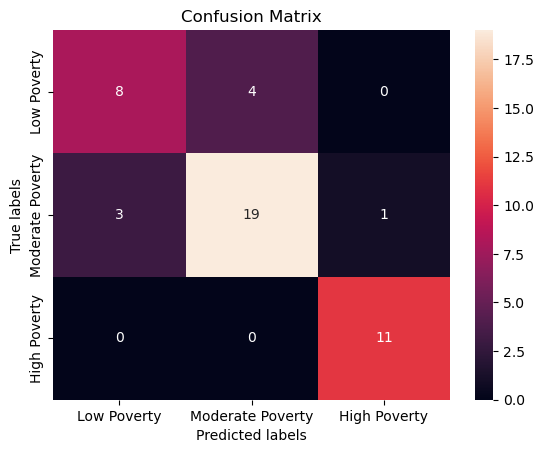

In [14]:
# Get the best model from GridSearchCV
best_log_reg = grid_search_log.best_estimator_

# Predict on the test set
y_pred_t = best_log_reg.predict(X_test_t)
y_pred_prob_t = best_log_reg.predict_proba(X_test_t)  # Probability for all classes

# Calculate metrics
accuracy_lr3 = accuracy_score(y_test_t, y_pred_t)
precision_lr3 = precision_score(y_test_t, y_pred_t, average='weighted')  # For multiclass
recall_lr3 = recall_score(y_test_t, y_pred_t, average='weighted')
f1_lr3 = f1_score(y_test_t, y_pred_t, average='weighted')
auc_lr3 = roc_auc_score(y_test_t, y_pred_prob_t, multi_class="ovr")  # FIXED

# Print results
print(f"Accuracy: {accuracy_lr3:.4f}")
print(f"Precision: {precision_lr3:.4f}")
print(f"Recall: {recall_lr3:.4f}")
print(f"F1 score: {f1_lr3:.4f}")
print(f"AUC: {auc_lr3:.4f}")

# Add confusion matrix
plot_confusion_matrix(y_test_t, y_pred_t)

Note:  the first run of the logistic regression model showed a gap in accuracy of 25% b/w cross validation and prediction.  I went back and increased test sample to 25% and cv fold to 10. the accuracy gap came down to just 7%.  Making the model in theory more likely to better predict real life situations. because of the smaller sample in the poverty data set i will use this test size and cv strategy moving forward

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 3.2b Multi-Class Logistic Regression - Evaluate feature importance ranking

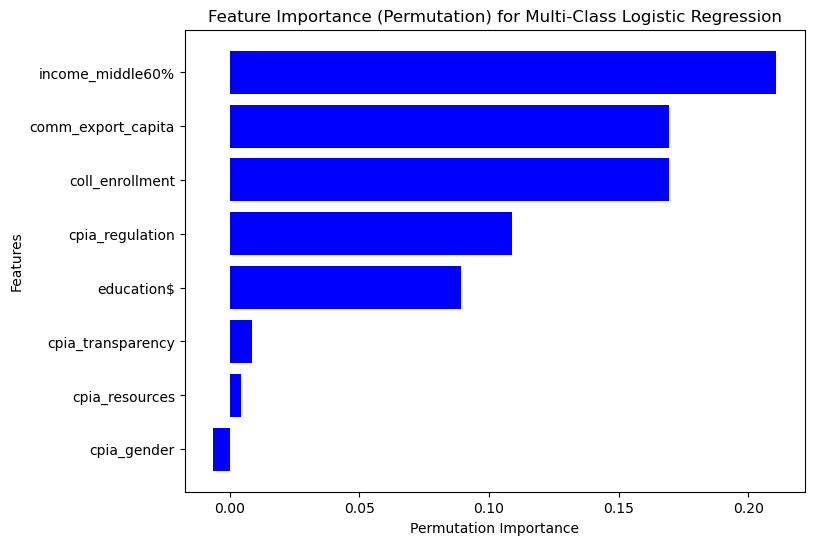

In [15]:
# Get the best model from GridSearchCV
best_logreg_model = grid_search_log.best_estimator_

# Compute permutation importance
result = permutation_importance(
    best_logreg_model, X_test_t, y_test_t, scoring='accuracy', n_repeats=10, random_state=42
)

# Extract importance values
feature_importance = result.importances_mean  # Mean importance over multiple shuffles

# Create feature names (assuming X_train_t is a DataFrame)
feature_names = X_train_t.columns if hasattr(X_train_t, 'columns') else [f"Feature {i}" for i in range(X_train_t.shape[1])]

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="blue")
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Permutation) for Multi-Class Logistic Regression")
plt.show()


#### 3.3 Multi-Class Support Vector Machine - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [16]:
# Define the estimator
svm = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_t, y_train_t)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.8401098901098901


##### 3.3a Multi-Class Support Vector Machine - Evaluate model performance metrics

Accuracy: 0.8696
Precision: 0.8722
Recall: 0.8696
F1-score: 0.8683


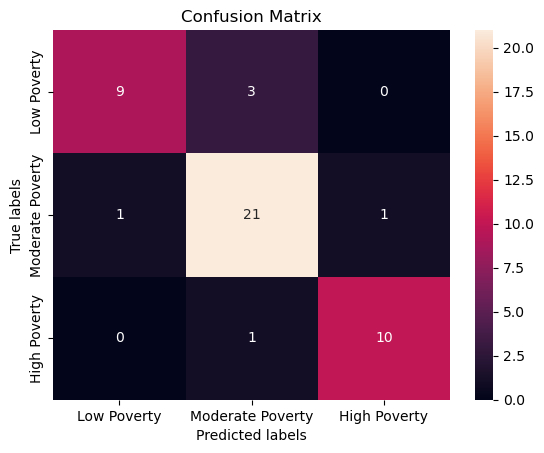

In [17]:
# Get the best SVM model from GridSearchCV
best_svm = grid_search.best_estimator_

# Predict on the test set
y_pred_t = best_svm.predict(X_test_t)

# Calculate metrics
accuracy_svm3 = accuracy_score(y_test_t, y_pred_t)
precision_svm3 = precision_score(y_test_t, y_pred_t, average='weighted')  # For multiclass
recall_svm3 = recall_score(y_test_t, y_pred_t, average='weighted')
f1_svm3 = f1_score(y_test_t, y_pred_t, average='weighted')

# Print results
print(f"Accuracy: {accuracy_svm3:.4f}")
print(f"Precision: {precision_svm3:.4f}")
print(f"Recall: {recall_svm3:.4f}")
print(f"F1-score: {f1_svm3:.4f}")

#  Add confusion matrix
plot_confusion_matrix(y_test_t, y_pred_t)

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 3.3b Multi-Class Support Vector Machine - Evaluate feature importance ranking

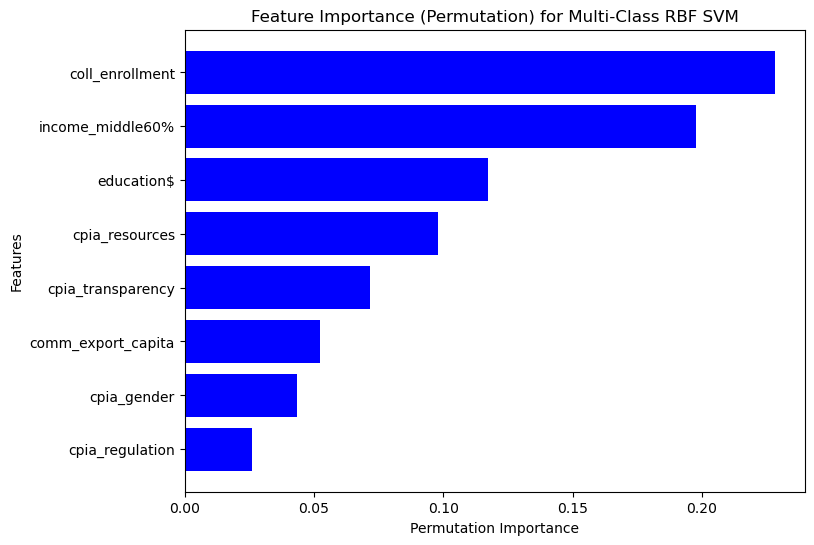

In [18]:
# Compute permutation importance
result = permutation_importance(grid_search.best_estimator_, X_test_t, y_test_t, scoring='accuracy', n_repeats=10, random_state=42)

# Extract importance values
feature_importance = result.importances_mean  # Mean importance over multiple shuffles

# Create feature names (assuming X_train_t is a DataFrame)
feature_names = X_train_t.columns if hasattr(X_train_t, 'columns') else [f"Feature {i}" for i in range(X_train_t.shape[1])]

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="blue")
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Permutation) for Multi-Class RBF SVM")
plt.show()


#### 3.4 Discriminative model's train/test split with binary-class transformed target variable
[🔝 Return to Table of Contents](#Table-of-Contents)

In [19]:
# Split the data
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_t_scaled, y_t_cat2, test_size=0.25, random_state=0, stratify=y_t_cat2 # Changed the split to 25% b/c of the gap between validation acc and preduction acc
)

# Display the class distributions in training and test sets
print("Training set class distribution:\n", y_train_t.value_counts(normalize=True), '\n')
print("Test set class distribution:\n", y_test_t.value_counts(normalize=True))

Training set class distribution:
 1    0.521739
0    0.478261
Name: %pov, dtype: float64 

Test set class distribution:
 1    0.521739
0    0.478261
Name: %pov, dtype: float64


#### 3.5 Binary-Class Logistic Regression - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [20]:
# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Ensure convergence

# Define hyperparameter grid for tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear", "saga"],  # Compatible solvers for L1 and L2
}

# Set up GridSearchCV
grid_search_log = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="accuracy",
    cv=10,  # 5-fold cross-validation, then i adjusted to 10
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
grid_search_log.fit(X_train_t, y_train_t)

# Print best parameters and best score
print("Best Parameters:", grid_search_log.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_log.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7884615384615385


[🔝 Return to Table of Contents](#Table-of-Contents)
##### 3.5a Binary-Class Logistic Regression - Evaluate model performance metrics

Accuracy: 0.7826
Precision: 0.7333
Recall: 0.9167
F1 score: 0.7775
AUC: 0.9242


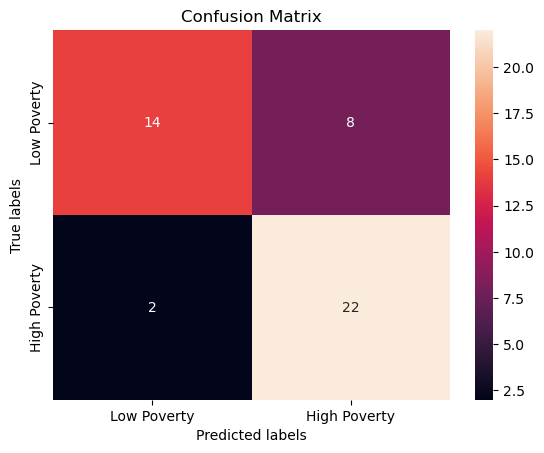

In [21]:
# Get the best model from GridSearchCV
best_log_reg = grid_search_log.best_estimator_

# Predict on the test set
y_pred_t = best_log_reg.predict(X_test_t)
y_pred_prob_t = best_log_reg.predict_proba(X_test_t)[:, 1]  # Probability for the positive class

# Calculate metrics
accuracy_lr2 = accuracy_score(y_test_t, y_pred_t)
precision_lr2 = precision_score(y_test_t, y_pred_t, average='binary')  # Adjusted for binary classification
recall_lr2 = recall_score(y_test_t, y_pred_t, average='binary')
f1_lr2 = f1_score(y_test_t, y_pred_t, average='weighted')
auc_lr2 = roc_auc_score(y_test_t, y_pred_prob_t)  # Removed multi_class argument

# Print results
print(f"Accuracy: {accuracy_lr2:.4f}")
print(f"Precision: {precision_lr2:.4f}")
print(f"Recall: {recall_lr2:.4f}")
print(f"F1 score: {f1_lr2:.4f}")
print(f"AUC: {auc_lr2:.4f}")

# Add confusion matrix
plot_confusion_matrix2(y_test_t, y_pred_t)

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 3.5b Binary-Class Logistic Regression - Evaluate feature importance ranking

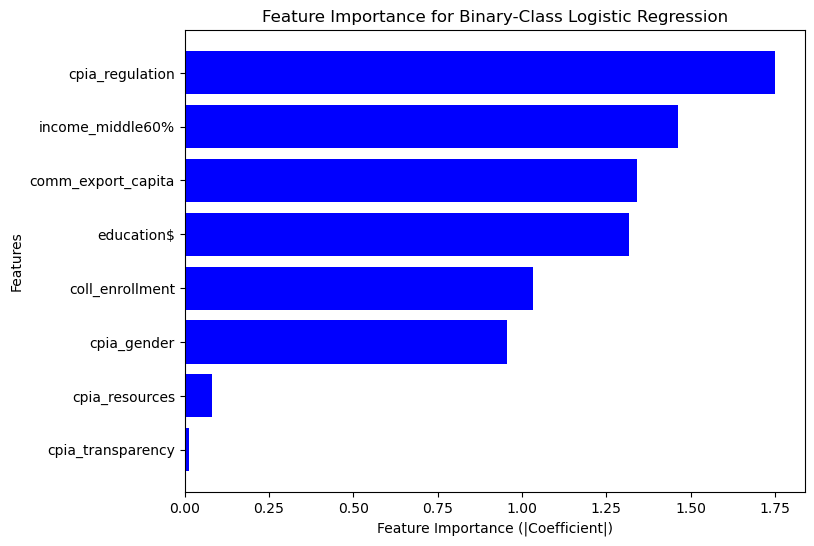

In [22]:
# Get the best model from GridSearchCV
best_model = grid_search_log.best_estimator_

# Extract feature importance (absolute coefficient values)
feature_importance = np.abs(best_model.coef_).flatten()

# Create feature names (assuming X_train_t is a DataFrame)
feature_names = X_train_t.columns if hasattr(X_train_t, 'columns') else [f"Feature {i}" for i in range(X_train_t.shape[1])]

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="blue")
plt.xlabel("Feature Importance (|Coefficient|)")
plt.ylabel("Features")
plt.title("Feature Importance for Binary-Class Logistic Regression")
plt.show()


#### 3.6 Binary-Class Support Vector Machine - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [23]:
# Define the estimator
svm = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'
}

# Set up GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_t, y_train_t)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy: 0.8774725274725276


[🔝 Return to Table of Contents](#Table-of-Contents)
##### 3.6a Binary-Class Support Vector Machine - Evaluate model performance metrics

Accuracy: 0.9130
Precision: 0.9167
Recall: 0.9167
F1 score: 0.9167


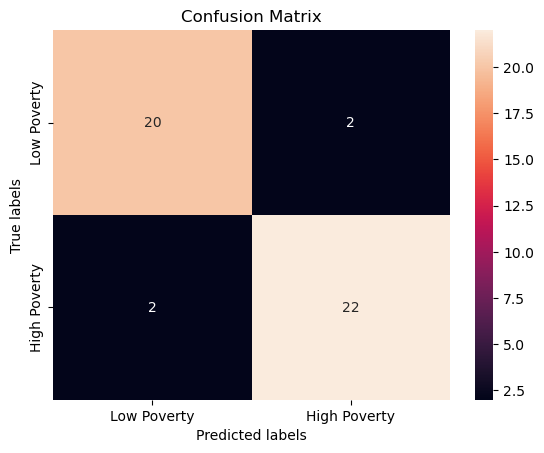

In [24]:
# Predict on test data
y_pred = grid_search.best_estimator_.predict(X_test_t)

# Evaluate performance
accuracy_svm2 = accuracy_score(y_test_t, y_pred)
precision_svm2 = precision_score(y_test_t, y_pred)
recall_svm2 = recall_score(y_test_t, y_pred)
f1_svm2 = f1_score(y_test_t, y_pred)

# Print results
print(f"Accuracy: {accuracy_svm2:.4f}")
print(f"Precision: {precision_svm2:.4f}")
print(f"Recall: {recall_svm2:.4f}")
print(f"F1 score: {f1_svm2:.4f}")

# Add confusion matrix
plot_confusion_matrix2(y_test_t, y_pred)

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 3.6b Binary-Class Support Vector Machine - Evaluate feature importance ranking

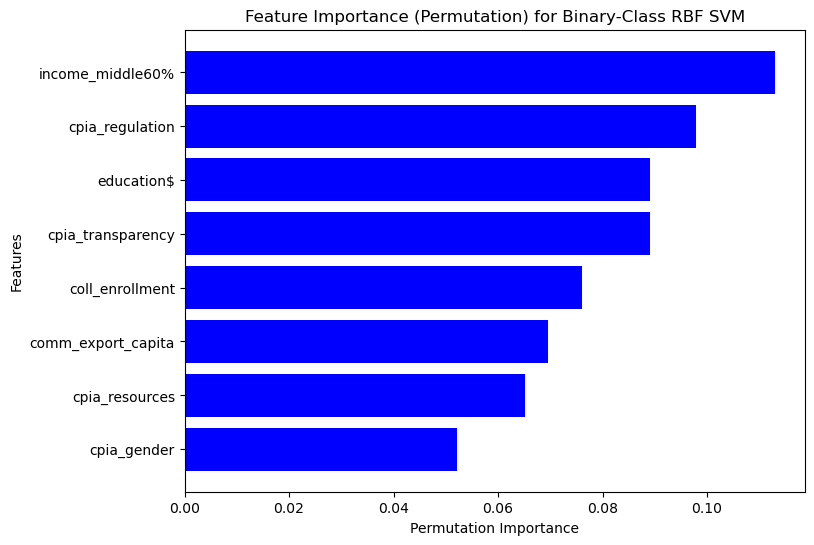

In [25]:
# Compute permutation importance
result = permutation_importance(grid_search.best_estimator_, X_test_t, y_test_t, scoring='accuracy', n_repeats=10, random_state=42)

# Extract importance values
feature_importance = result.importances_mean  # Mean importance over multiple shuffles

# Create feature names (assuming X_train_t is a DataFrame)
feature_names = X_train_t.columns if hasattr(X_train_t, 'columns') else [f"Feature {i}" for i in range(X_train_t.shape[1])]

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="blue")
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Permutation) for Binary-Class RBF SVM")
plt.show()


### 4. Tree Models

#### 4.1 Tree model's train/test split with non-transformed multi-class target variable
[🔝 Return to Table of Contents](#Table-of-Contents)

In [26]:
# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_nt_scaled, y_nt_cat3, test_size=0.25, random_state=0, stratify=y_nt_cat3
)

# Verify the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 138
Test set size: 46


#### 4.2 Multi-Class Decision Tree - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [27]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=0)

# Define hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy"],  # Splitting criteria
    "max_depth": [None, 5, 10, 20],  # Depth of tree
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 5]  # Minimum samples per leaf
}

# Set up GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="accuracy",  # Adjust if needed
    cv=10,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
grid_search_dt.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_dt.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.782967032967033


[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.2a Multi-Class Decision Tree - Evaluate model performance metrics

Accuracy: 0.6304
Precision: 0.6519
Recall: 0.6304
F1 score: 0.6242
AUC: 0.6958


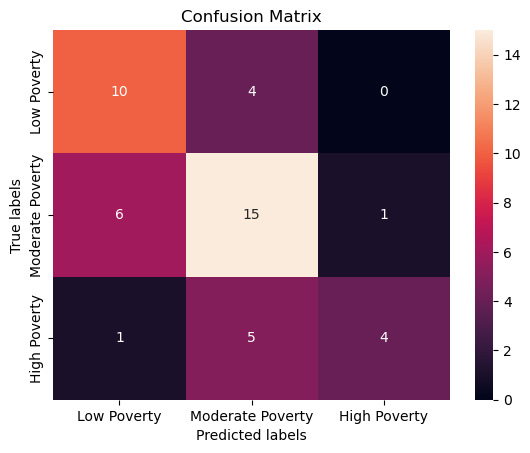

In [28]:
# Get the best model from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Compute metrics
accuracy_dt3 = accuracy_score(y_test, y_pred)
precision_dt3 = precision_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
recall_dt3 = recall_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
f1_dt3 = f1_score(y_test, y_pred, average='weighted')

# Compute AUC (only valid for binary classification or with multi-class 'ovr')
if len(set(y_test)) == 2:
    auc_dt3 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
else:
    auc_dt3 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test), multi_class="ovr")

# Print results
print(f"Accuracy: {accuracy_dt3:.4f}")
print(f"Precision: {precision_dt3:.4f}")
print(f"Recall: {recall_dt3:.4f}")
print(f"F1 score: {f1_dt3:.4f}")
print(f"AUC: {auc_dt3:.4f}")

# Add confusion matrix
plot_confusion_matrix(y_test, y_pred)

Note: all performance metrics are much lower than training validation score which could suggest overfitting

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.2b Multi-Class Decision Tree - Evaluate feature importance ranking

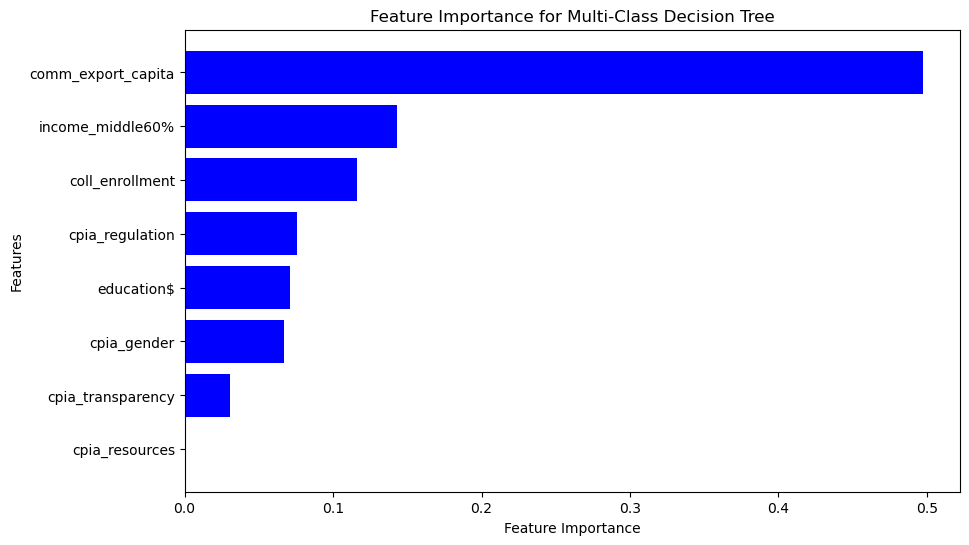

In [29]:
# Get feature importances from the best Decision Tree model
feature_importance = best_dt_model.feature_importances_

# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Multi-Class Decision Tree")
plt.show()

#### 4.3 Multi-Class Random Forest - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [30]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=0, n_jobs=-1)  # Use all available cores

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split
    "min_samples_leaf": [1, 2, 5],  # Minimum samples per leaf
    "criterion": ["gini", "entropy"]  # Splitting criteria
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="accuracy",  # Adjust scoring if needed
    cv=10,  # 10-fold cross-validation
    n_jobs=-1  # Parallel processing
)

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8549450549450549


[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.3a Multi-Class Random Forest - Evaluate model performance metrics

Accuracy: 0.8478
Precision: 0.8627
Recall: 0.8478
F1 score: 0.8443
AUC: 0.6958


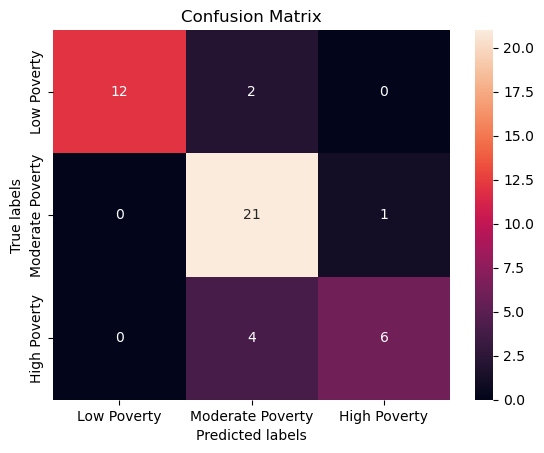

In [31]:
# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Compute metrics
accuracy_rf3 = accuracy_score(y_test, y_pred)
precision_rf3 = precision_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
recall_rf3 = recall_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
f1_rf3 = f1_score(y_test, y_pred, average='weighted')

# Compute AUC (only valid for binary classification or with multi-class 'ovr')
if len(set(y_test)) == 2:
    auc_rf3 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
else:
    auc_rf3 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test), multi_class="ovr")

# Print results
print(f"Accuracy: {accuracy_rf3:.4f}")
print(f"Precision: {precision_rf3:.4f}")
print(f"Recall: {recall_rf3:.4f}")
print(f"F1 score: {f1_rf3:.4f}")
print(f"AUC: {auc_rf3:.4f}")

plot_confusion_matrix(y_test, y_pred)

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.3b Multi-Class Random Forest - Evaluate feature importance ranking

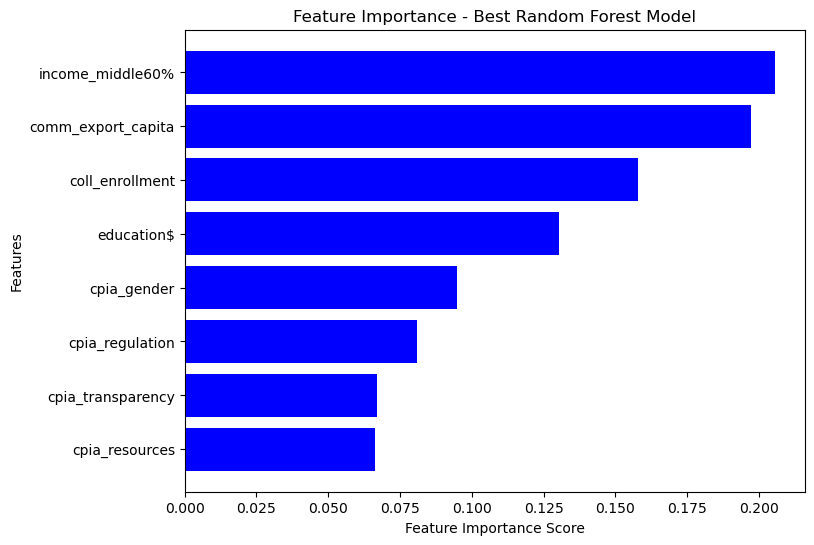

In [32]:
# Get feature importance scores
feature_importance = best_rf_model.feature_importances_

# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort features by importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="blue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Best Random Forest Model")
plt.show()

#### 4.4 Tree model's train/test split with non-transformed binary target variable
[🔝 Return to Table of Contents](#Table-of-Contents)

In [33]:
# Perform train-test split with stratification for binary classification
X_train, X_test, y_train, y_test = train_test_split(
    X_nt_scaled, y_nt_cat2, test_size=0.25, random_state=0, stratify=y_nt_cat2
)

# Verify the split
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 138
Test set size: 46


#### 4.5 Binary-Class Decision Tree - Train and fit data 
[🔝 Return to Table of Contents](#Table-of-Contents)

In [34]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=0)

# Define hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy"],  # Splitting criteria
    "max_depth": [None, 5, 10, 20],  # Depth of tree
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 5]  # Minimum samples per leaf
}

# Set up GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="accuracy",  # Adjust if needed
    cv=10,  # 10-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
grid_search_dt.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_dt.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.8406593406593407


[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.5a Binary-Class Decision Tree - Evaluate model performance metrics

Accuracy: 0.8696
Precision: 0.8819
Recall: 0.8696
F1 score: 0.8691
AUC: 0.9347


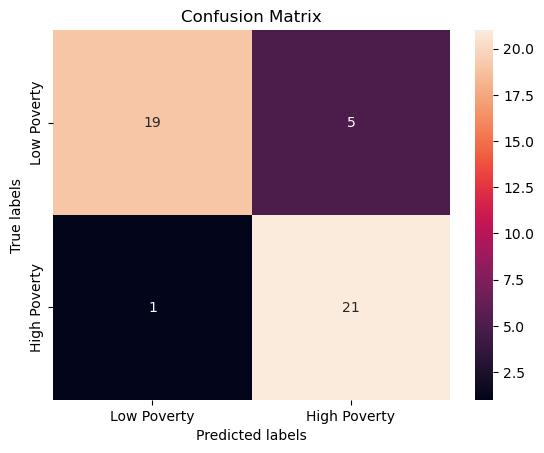

In [35]:
# Get the best model from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Compute metrics
accuracy_dt2 = accuracy_score(y_test, y_pred)
precision_dt2 = precision_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
recall_dt2 = recall_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
f1_dt2 = f1_score(y_test, y_pred, average='weighted')

# Compute AUC (only valid for binary classification or with multi-class 'ovr')
if len(set(y_test)) == 2:
    auc_dt2 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
else:
    auc_dt2 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test), multi_class="ovr")

# Print results
print(f"Accuracy: {accuracy_dt2:.4f}")
print(f"Precision: {precision_dt2:.4f}")
print(f"Recall: {recall_dt2:.4f}")
print(f"F1 score: {f1_dt2:.4f}")
print(f"AUC: {auc_dt2:.4f}")

# Add confusion matrix
plot_confusion_matrix2(y_test, y_pred)

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.5b Binary-Class Decision Tree - Evaluate feature importance ranking

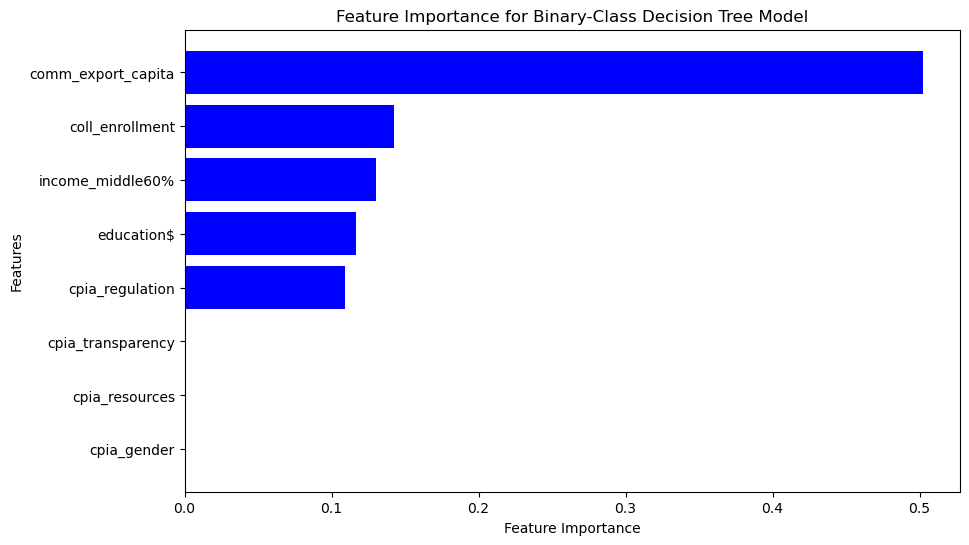

In [36]:
# Extract feature importance
feature_importance = best_dt_model.feature_importances_

# Create feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

# Plot feature importance as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Binary-Class Decision Tree Model")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

#### 4.6 Binary-Class Random Forest - Train and fit data
[🔝 Return to Table of Contents](#Table-of-Contents)

In [37]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split
    "min_samples_leaf": [1, 2, 5],  # Minimum samples per leaf
    "criterion": ["gini", "entropy"]  # Splitting criteria
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="accuracy",  # Adjust scoring if needed
    cv=10,  # 10-fold cross-validation
    n_jobs=-1  # Parallel processing
)

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8697802197802199


[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.6a Binary-Class Random Forest - Evaluate model performance metrics

Accuracy: 0.9565
Precision: 0.9565
Recall: 0.9565
F1 score: 0.9565
AUC: 0.9347


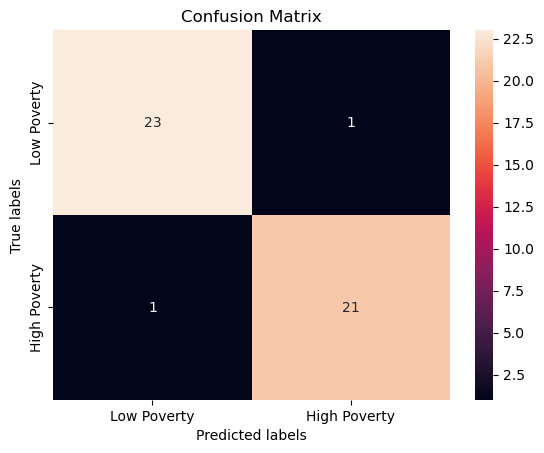

In [38]:
# Get the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Compute metrics
accuracy_rf2 = accuracy_score(y_test, y_pred)
precision_rf2 = precision_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
recall_rf2 = recall_score(y_test, y_pred, average='weighted')  # Adjust 'weighted' if needed
f1_rf2 = f1_score(y_test, y_pred, average='weighted')

# Compute AUC (only valid for binary classification or with multi-class 'ovr')
if len(set(y_test)) == 2:
    auc_rf2 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1])
else:
    auc_rf2 = roc_auc_score(y_test, best_dt_model.predict_proba(X_test), multi_class="ovr")

# Print results
print(f"Accuracy: {accuracy_rf2:.4f}")
print(f"Precision: {precision_rf2:.4f}")
print(f"Recall: {recall_rf2:.4f}")
print(f"F1 score: {f1_rf2:.4f}")
print(f"AUC: {auc_rf2:.4f}")

# Add confusion matrix
plot_confusion_matrix2(y_test, y_pred)

[🔝 Return to Table of Contents](#Table-of-Contents)
##### 4.6b Binary-Class Random Forest - Evaluate feature importance ranking

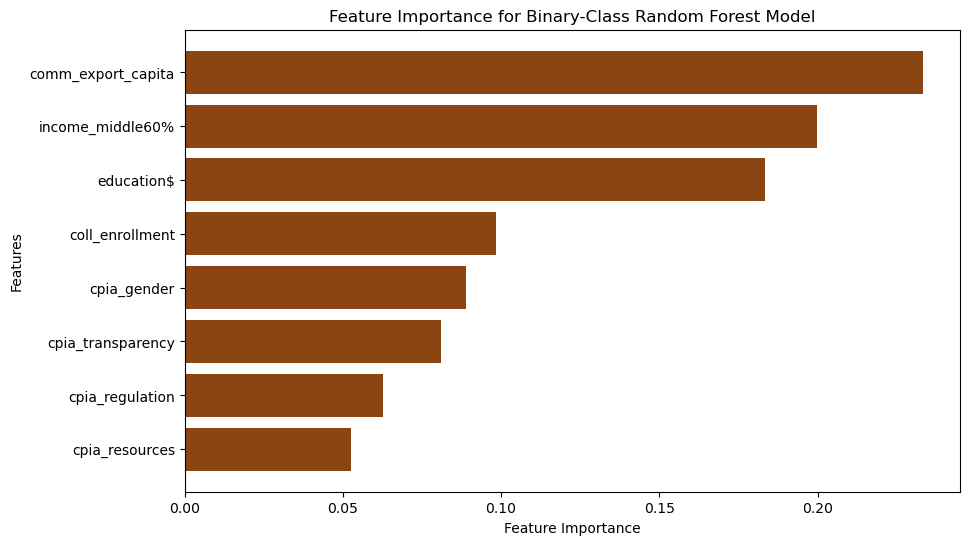

In [39]:
# Extract feature importance
feature_importance = best_rf_model.feature_importances_

# Create feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

# Plot feature importance as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color="saddlebrown")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Binary-Class Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

#### 4.7 Model Comparison - Make a dictionary of model performance metrics
[🔝 Return to Table of Contents](#Table-of-Contents)

In [40]:
model_performance_dict = {
    # Polynomial Regression
    'REG LinReg R2': r2_lr,
    
    # Support Vector Machine Regressor
    'REG SVMReg R2': r2_svm,
    
    # Multi-Class Logistic Regression
    'MC LogReg Accuracy': accuracy_lr3, 
    'MC LogReg Precision': precision_lr3, 
    'MC LogReg Recall': recall_lr3, 
    'MC LogReg F1-Score': f1_lr3, 
    'MC LogReg AUC': auc_lr3,

    # Multi-Class SVM
    'MC SVM Accuracy': accuracy_svm3, 
    'MC SVM Precision': precision_svm3, 
    'MC SVM Recall': recall_svm3, 
    'MC SVM F1-Score': f1_svm3,

    # Multi-Class Decision Tree
    'MC DT Accuracy': accuracy_dt3, 
    'MC DT Precision': precision_dt3, 
    'MC DT Recall': recall_dt3, 
    'MC DT F1-Score': f1_dt3, 
    'MC DT AUC': auc_dt3,

    # Multi-Class Random Forest
    'MC RF Accuracy': accuracy_rf3, 
    'MC RF Precision': precision_rf3, 
    'MC RF Recall': recall_rf3, 
    'MC RF F1-Score': f1_rf3, 
    'MC RF AUC': auc_rf3,

    # Binary-Class Logistic Regression
    'BC LogReg Accuracy': accuracy_lr2, 
    'BC LogReg Precision': precision_lr2, 
    'BC LogReg Recall': recall_lr2, 
    'BC LogReg F1-Score': f1_lr2, 
    'BC LogReg AUC': auc_lr2,

    # Binary-Class SVM
    'BC SVM Accuracy': accuracy_svm2, 
    'BC SVM Precision': precision_svm2, 
    'BC SVM Recall': recall_svm2, 
    'BC SVM F1-Score': f1_svm2,

    # Binary-Class Decision Tree
    'BC DT Accuracy': accuracy_dt2, 
    'BC DT Precision': precision_dt2, 
    'BC DT Recall': recall_dt2, 
    'BC DT F1-Score': f1_dt2, 
    'BC DT AUC': auc_dt2,

    # Binary-Class Random Forest
    'BC RF Accuracy': accuracy_rf2, 
    'BC RF Precision': precision_rf2, 
    'BC RF Recall': recall_rf2, 
    'BC RF F1-Score': f1_rf2, 
    'BC RF AUC': auc_rf2
}

#### 4.8 Model Comparison - Make dataframe from dictionary
[🔝 Return to Table of Contents](#Table-of-Contents)

In [41]:
# Convert dictionary to DataFrame
Model_performance_df = pd.DataFrame.from_dict(model_performance_dict, orient='index', columns=['Score'])

# Reset index for better readability
Model_performance_df.reset_index(inplace=True)
Model_performance_df.columns = ['Metric', 'Score']

# Extract 1st two words to create 'Model_Group'
Model_performance_df['Model_Group'] = Model_performance_df['Metric'].apply(lambda x: ' '.join(x.split()[:2]))

# Extract the third word for 'Metric_Type'
Model_performance_df['Metric_Type'] = Model_performance_df['Metric'].apply(
    lambda x: x.split()[2] if len(x.split()) > 2 else None
)

# Extract the second word for 'Model'
Model_performance_df['Model'] = Model_performance_df['Metric'].apply(
    lambda x: x.split()[1] if len(x.split()) == 3 else None
)


# Display updated DataFrame
print(Model_performance_df)


                 Metric     Score Model_Group Metric_Type   Model
0         REG LinReg R2  0.561471  REG LinReg          R2  LinReg
1         REG SVMReg R2  0.662957  REG SVMReg          R2  SVMReg
2    MC LogReg Accuracy  0.826087   MC LogReg    Accuracy  LogReg
3   MC LogReg Precision  0.821970   MC LogReg   Precision  LogReg
4      MC LogReg Recall  0.826087   MC LogReg      Recall  LogReg
5    MC LogReg F1-Score  0.823251   MC LogReg    F1-Score  LogReg
6         MC LogReg AUC  0.895178   MC LogReg         AUC  LogReg
7       MC SVM Accuracy  0.869565      MC SVM    Accuracy     SVM
8      MC SVM Precision  0.872174      MC SVM   Precision     SVM
9         MC SVM Recall  0.869565      MC SVM      Recall     SVM
10      MC SVM F1-Score  0.868330      MC SVM    F1-Score     SVM
11       MC DT Accuracy  0.630435       MC DT    Accuracy      DT
12      MC DT Precision  0.651854       MC DT   Precision      DT
13         MC DT Recall  0.630435       MC DT      Recall      DT
14       M

#### 4.9 Model Comparison - Plot comparison of model performance
[🔝 Return to Table of Contents](#Table-of-Contents)

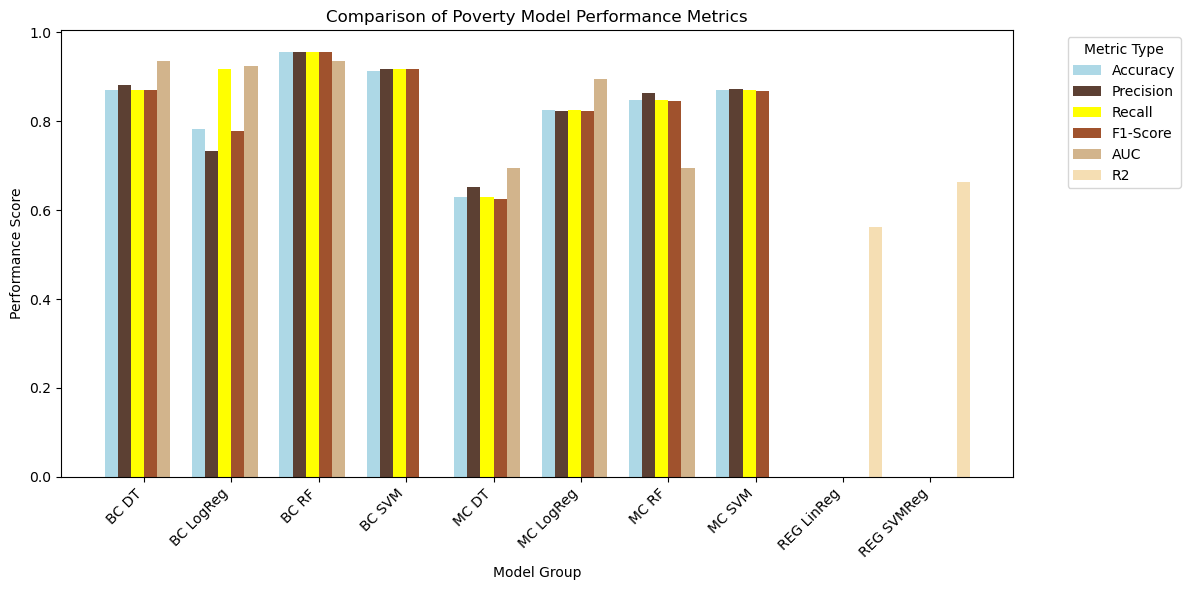

In [42]:
'''# Pivot data
df_pivot = Model_performance_df.pivot(index='Model_Group', columns='Metric_Type', values='Score')

# Plot
plt.figure(figsize=(12, 6))
df_pivot.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='viridis')

# Formatting
plt.xlabel("Model Group")
plt.ylabel("Performance Score")
plt.title("Comparison of Model Performance Metrics")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title="Metric Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside

plt.tight_layout()
plt.show()'''


brown_to_beige = [
    '#ADD8E6',  # light blue
    '#5C4033',  # dark mocha
    '#FFFF00',  # yellow
    '#A0522D',  # sienna
    '#D2B48C',  # tan
    '#F5DEB3'   # wheat (soft beige)
]

# Pivot DataFrame
df_pivot = Model_performance_df.pivot(index='Model_Group', columns='Metric_Type', values='Score')

# Reorder columns by importance
preferred_order = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'R2']
df_pivot = df_pivot[preferred_order]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df_pivot))  # Number of groups
width = 0.15  # Width of each bar

for i, col in enumerate(df_pivot.columns):
    ax.bar(
        x + i * width,
        df_pivot[col],
        width=width,
        label=col,
        color=brown_to_beige[i % len(brown_to_beige)]
    )

# Formatting
ax.set_xticks(x + width * (len(df_pivot.columns) - 1) / 2)
ax.set_xticklabels(df_pivot.index, rotation=45, ha='right')
ax.set_xlabel("Model Group")
ax.set_ylabel("Performance Score")
ax.set_title("Comparison of Poverty Model Performance Metrics")
ax.legend(title="Metric Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

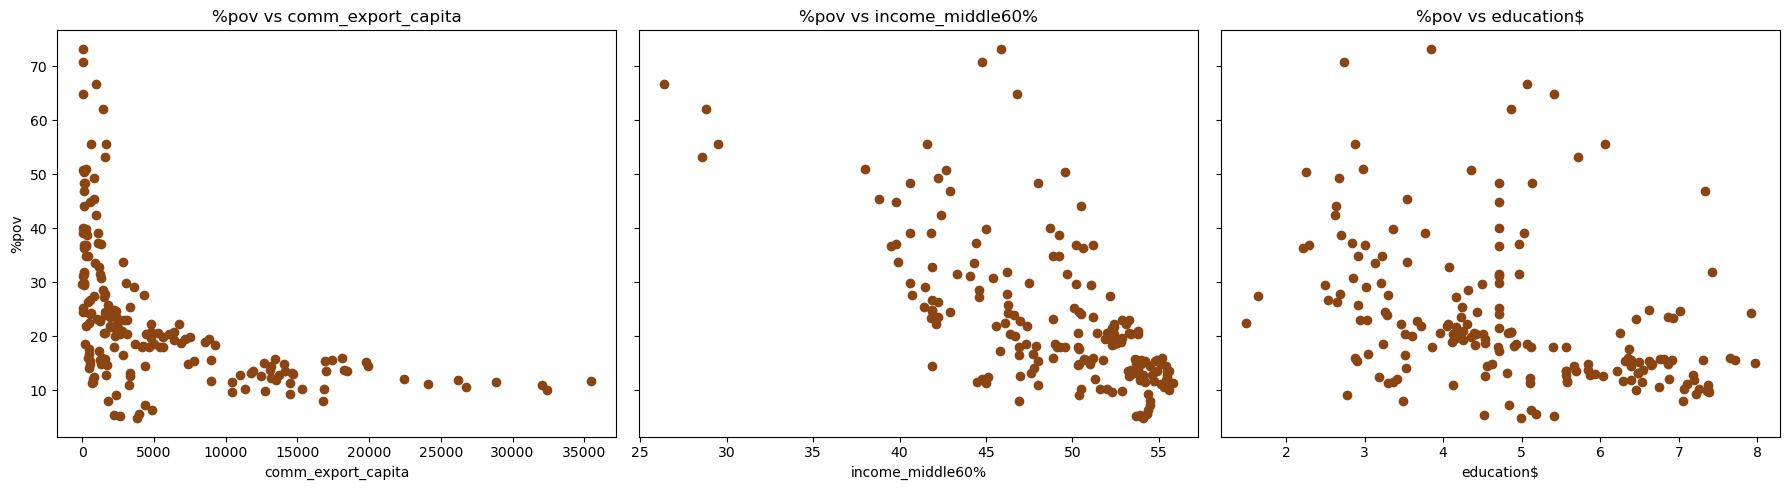

In [43]:
# List of x-axis columns
x_columns = ['comm_export_capita', 'income_middle60%', 'education$']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot each scatter plot
for i, col in enumerate(x_columns):
    axes[i].scatter(df_pov_3_not_transformed[col], df_pov_3_not_transformed['%pov'], color='saddlebrown')
    axes[i].set_xlabel(col)
    if i == 0:
        axes[i].set_ylabel('%pov')
    axes[i].set_title(f'%pov vs {col}')

plt.tight_layout()
plt.show()
